In [39]:
import atd2022
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas import datetime

/var/folders/ps/25j8kg513zg1zlwxxrcfl85m0000gn/T/ipykernel_7708/326335966.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [64]:
data = atd2022.io.read_csv()

In [41]:
from dataclasses import dataclass
from typing import Optional
import my_mod as util
import pandas as pd
import gc
import numpy as np
#from my_mod import CNN_ForecastNet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [60]:
from arimaForecaster import arimaForecaster

IndentationError: unexpected indent (arimaForecaster.py, line 64)

In [43]:
data2 = data.reset_index(drop=True)

In [63]:
   # def fit(self, data: pd.DataFrame(), past_covariates=None) -> "arimaForecaster": # dont htink that I would need past covs
full_df=data
name_lst = [] #simply just extracting all regions from the data set
for i in range(0,full_df.shape[1],20):
    name = full_df.columns[i][0]
    name_lst.append(name)
            
    model_list=[]
       
    for region_name in name_lst:
            
            
        region_df = full_df[region_name]
           
            # i think that ^ this is all i need to can't i just use all the data for training of the data
            
        x, y_train = util.getMultiDXY(df=region_df, n_lags=2)
        n_features = 20
        x_train=x.reshape((x.shape[0], x.shape[1], n_features))  # need to print the reshaping not sure what exactly doing and why has 2 cols.
            
        history = [k for k in x_train] # might be slightly incorreect this how the data was just played with above
        model = ARIMA(history, order =(5,1,0)) # x in this case should be the history 
        model_list.append(model) # i dont understand what this is doing adding each regions or cols model to the model list 

ValueError: SARIMAX models require univariate `endog`. Got shape (213, 2, 20).

In [52]:
class arimaForecaster:
    
#fit is where the training is occurring not just fitting data 
    def fit(self, data: pd.DataFrame(), past_covariates=None) -> "arimaForecaster": # dont htink that I would need past covs
        full_df=data 
        name_lst = [] #simply just extracting all regions from the data set
        for i in range(0,full_df.shape[1],20):
            name = full_df.columns[i][0]
            name_lst.append(name)
            
        self.model_list=[]
       
        for region_name in name_lst:
            
            
            region_df = full_df[region_name]
           
            # i think that ^ this is all i need to can't i just use all the data for training of the data
            
            x, y_train = util.getMultiDXY(df=region_df, n_lags=2)
            n_features = 20
            x_train=x.reshape((x.shape[0], x.shape[1], n_features))  # need to print the reshaping not sure what exactly doing and why has 2 cols.
            
            #up to this is just splitting the data and making is fit for 1d cnn
            
            #self.model = CNN_ForecastNet().to(device)  # save it for later
            history = [x for x in x_train] # might be slightly incorreect this how the data was just played with above
            #might need to be the entire training set
            self.model = ARIMA(history, order =(5,1,0)) # x in this case should be the history 

            #optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-5)
            #criterion = nn.MSELoss() 
        #    train = util.myDataset(x_train,y_train)
     #       train_loader = torch.utils.data.DataLoader(train,batch_size=1,shuffle=False)
       #     training_epochs = 800
      #      epochs = training_epochs


            
            self.model_list.append(self.model) # i dont understand what this is doing adding each regions or cols model to the model list 
        return self

    def predict(self, x: pd.Index) -> pd.DataFrame:

        train_df = self.training_df
        predictions = self.generate_pred(full_df=train_df)
        predictions[predictions<0]=0    
        return predictions

    def generate_pred(self, full_df:pd.DataFrame):
        model_list = self.model_list

        name_lst = []
        for i in range(0,full_df.shape[1],20):
            name = full_df.columns[i][0]
            name_lst.append(name)
        current_iter=0
        pred_lst=[]
        for region_name in name_lst:
            current_model = model_list[current_iter]
            region_df = full_df[region_name]
            pred = util.pre_trained_region_pred(model=current_model, region_df=region_df, n_lags=2)
            pred = np.round(pred)

            col_lst=[]
            for i in range(1,21):
                col=(region_name, i)
                col_lst.append(col)
        
            cols=pd.MultiIndex.from_tuples(col_lst)
            pred_lst.append(pd.DataFrame(data=pred, columns=cols))
    
        final = pd.concat(pred_lst, axis=1)
        return final

    

In [53]:
data.fit()

AttributeError: 'DataFrame' object has no attribute 'fit'

In [29]:

temp_ls = []

for region in data2:
    temp_region = data2[region]
    #print(temp_region
      
    y = temp_region.values 
    train, test = train_test_split(y, train_size=150)

    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    
    #okay so this is just testing on the test data set, i guess the model requires no training or anything as is stats model 
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast(4, alpha = 0.01) #can be adjusted 
  
        #generate all 4 of the next preds? and then append to 
        yhat_1 = output[0] 
        yhat_2 = output[1] # does doing this cause the error?
        yhat_3 = output[2]
        yhat_4 = output[3]

        if yhat_1 < 0: 
            yhat_1 = 0
        
        elif yhat_2 < 0: 
            yhat_2 = 0
            
        elif yhat_3 < 0: 
            yhat_3 = 0
            
        elif yhat_4 < 0: 
            yhat_4 = 0 

        predictions.append(yhat_1) # this is just the predicted vals
        predictions.append(yhat_2)
        predictions.append(yhat_3)
        predictions.append(yhat_4)
        
        print('pred 1=%f, pred 2=%f, pred 3=%f,pred 4=%f' % (yhat_1, yhat_2, yhat_3, yhat_4))
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat_1, obs))

        

pred 1=7.368321, pred 2=8.467268, pred 3=10.037038,pred 4=9.042533
predicted=7.368321, expected=33.000000
pred 1=11.568543, pred 2=15.733736, pred 3=14.198277,pred 4=14.905773
predicted=11.568543, expected=13.000000
pred 1=15.911198, pred 2=14.510256, pred 3=15.207923,pred 4=20.117995
predicted=15.911198, expected=6.000000
pred 1=13.320683, pred 2=13.161416, pred 3=18.113955,pred 4=14.862292
predicted=13.320683, expected=2.000000
pred 1=11.728724, pred 2=15.910143, pred 3=12.713858,pred 4=9.815392
predicted=11.728724, expected=9.000000
pred 1=15.544128, pred 2=12.173300, pred 3=9.328984,pred 4=8.076881
predicted=15.544128, expected=3.000000
pred 1=10.441957, pred 2=6.639979, pred 3=5.702547,pred 4=6.890890
predicted=10.441957, expected=12.000000
pred 1=6.854526, pred 2=6.047522, pred 3=7.196100,pred 4=6.390553
predicted=6.854526, expected=0.000000
pred 1=5.173888, pred 2=5.673176, pred 3=5.028084,pred 4=6.488385
predicted=5.173888, expected=1.000000
pred 1=5.144208, pred 2=4.096388, pr

/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000
pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


pred 1=0.000000, pred 2=0.000000, pred 3=0.000000,pred 4=0.000000
predicted=0.000000, expected=0.000000


KeyboardInterrupt: 

In [14]:
data.head()

Region                AA                                 ...   ZI              \
Event                 01 02  03  04 05   06 07 08 09 10  ...   11  12  13  14   
2013-12-30/2014-01-05  0  0   0   6  0    0  0  0  0  0  ...   97  25  15   1   
2014-01-06/2014-01-12  2  0   0  11  0    1  0  0  0  0  ...  204  64  29  41   
2014-01-13/2014-01-19  0  1   3   7  1    0  0  0  0  0  ...  164  49  20   8   
2014-01-20/2014-01-26  0  1   0   4  0    0  0  2  0  0  ...   58  26  10   1   
2014-01-27/2014-02-02  6  1  59   3  0  103  0  4  0  0  ...  227  67  42  45   

Region                                          
Event                  15  16   17  18   19 20  
2013-12-30/2014-01-05  13   6   90  25   51  1  
2014-01-06/2014-01-12  16  22  174  56  118  0  
2014-01-13/2014-01-19   0  34   91  20   63  0  
2014-01-20/2014-01-26   3   8   47  16   22  0  
2014-01-27/2014-02-02   0  19  169  47   69  0  

[5 rows x 5200 columns]

In [15]:
data.index

PeriodIndex(['2013-12-30/2014-01-05', '2014-01-06/2014-01-12',
             '2014-01-13/2014-01-19', '2014-01-20/2014-01-26',
             '2014-01-27/2014-02-02', '2014-02-03/2014-02-09',
             '2014-02-10/2014-02-16', '2014-02-17/2014-02-23',
             '2014-02-24/2014-03-02', '2014-03-03/2014-03-09',
             ...
             '2017-12-04/2017-12-10', '2017-12-11/2017-12-17',
             '2017-12-18/2017-12-24', '2017-12-25/2017-12-31',
             '2018-01-01/2018-01-07', '2018-01-08/2018-01-14',
             '2018-01-15/2018-01-21', '2018-01-22/2018-01-28',
             '2018-01-29/2018-02-04', '2018-02-05/2018-02-11'],
            dtype='period[W-SUN]', length=215)

In [16]:
data2 = data.reset_index(drop=True)

In [17]:
region_AA = data2["AA"]

predicted=11.037702, expected=7.000000
predicted=12.926001, expected=14.000000
predicted=11.139961, expected=1.000000
predicted=8.673474, expected=14.000000
predicted=9.634917, expected=9.000000
predicted=12.045861, expected=24.000000
predicted=9.232254, expected=7.000000
predicted=11.292870, expected=12.000000
predicted=9.297078, expected=5.000000
predicted=13.893026, expected=13.000000
predicted=12.374223, expected=0.000000
predicted=12.282654, expected=12.000000
predicted=7.316924, expected=13.000000
predicted=9.883429, expected=10.000000
predicted=7.803716, expected=39.000000
predicted=10.479033, expected=3.000000
predicted=13.653394, expected=5.000000
predicted=11.457262, expected=11.000000
predicted=16.368148, expected=33.000000
predicted=17.506144, expected=3.000000
predicted=16.368844, expected=5.000000
predicted=7.508685, expected=12.000000
predicted=14.498993, expected=0.000000
predicted=13.901253, expected=7.000000
predicted=10.268455, expected=5.000000
predicted=6.376408, e

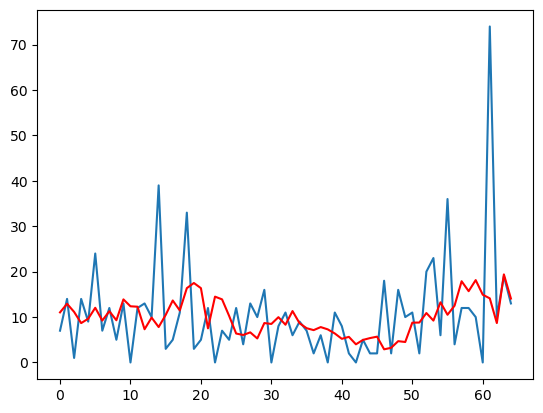

predicted=3.038349, expected=2.000000
predicted=3.138813, expected=2.000000
predicted=2.999509, expected=7.000000
predicted=3.029794, expected=1.000000
predicted=2.345462, expected=5.000000
predicted=3.520814, expected=0.000000
predicted=2.829842, expected=5.000000
predicted=3.466635, expected=2.000000
predicted=3.181992, expected=7.000000
predicted=3.194434, expected=9.000000
predicted=4.645449, expected=9.000000
predicted=4.987308, expected=2.000000
predicted=5.649507, expected=1.000000
predicted=5.542599, expected=1.000000
predicted=5.108978, expected=2.000000
predicted=3.688887, expected=0.000000
predicted=2.226454, expected=2.000000
predicted=1.511325, expected=1.000000
predicted=1.120221, expected=4.000000
predicted=1.734338, expected=5.000000
predicted=2.456715, expected=12.000000
predicted=4.539654, expected=5.000000
predicted=4.545115, expected=0.000000
predicted=4.339700, expected=0.000000
predicted=4.881913, expected=10.000000
predicted=5.737123, expected=5.000000
predicted=

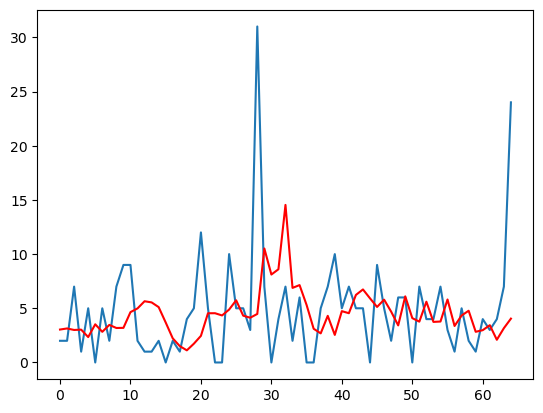

predicted=6.746858, expected=4.000000
predicted=5.696288, expected=4.000000
predicted=6.774357, expected=20.000000
predicted=10.315532, expected=8.000000
predicted=8.316457, expected=0.000000
predicted=6.091060, expected=7.000000
predicted=7.312200, expected=15.000000
predicted=9.431861, expected=0.000000
predicted=8.307925, expected=4.000000
predicted=5.836586, expected=10.000000
predicted=6.223937, expected=8.000000
predicted=7.070887, expected=2.000000
predicted=6.581033, expected=27.000000
predicted=8.616787, expected=4.000000
predicted=7.997869, expected=7.000000
predicted=9.716335, expected=4.000000
predicted=9.400899, expected=13.000000
predicted=8.779079, expected=21.000000
predicted=13.444625, expected=1.000000
predicted=7.358191, expected=9.000000
predicted=9.438024, expected=5.000000
predicted=9.267983, expected=7.000000
predicted=9.658132, expected=0.000000
predicted=7.724512, expected=0.000000
predicted=3.826012, expected=1.000000
predicted=4.099923, expected=7.000000
pred

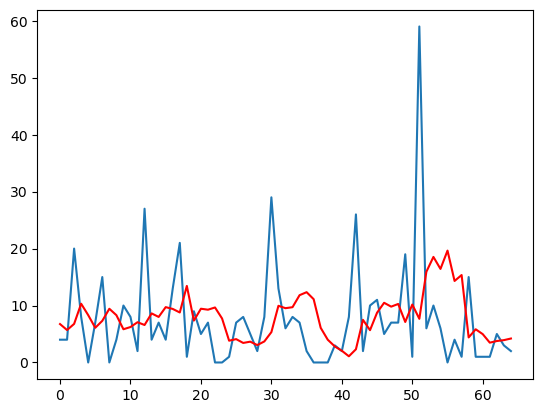

predicted=23.899412, expected=46.000000
predicted=18.116893, expected=11.000000
predicted=19.320346, expected=116.000000
predicted=25.518539, expected=9.000000
predicted=35.842719, expected=25.000000
predicted=49.658594, expected=12.000000
predicted=41.462242, expected=49.000000
predicted=37.125705, expected=59.000000
predicted=36.193060, expected=18.000000
predicted=30.346377, expected=27.000000
predicted=34.196810, expected=4.000000
predicted=36.065088, expected=24.000000
predicted=33.825496, expected=2.000000
predicted=23.435929, expected=28.000000
predicted=16.007894, expected=30.000000
predicted=14.906643, expected=11.000000
predicted=18.301084, expected=33.000000
predicted=18.527252, expected=58.000000
predicted=21.668299, expected=47.000000
predicted=31.224766, expected=6.000000
predicted=34.811987, expected=35.000000
predicted=35.011722, expected=45.000000
predicted=36.392520, expected=46.000000
predicted=35.852522, expected=9.000000
predicted=32.935543, expected=8.000000
predi

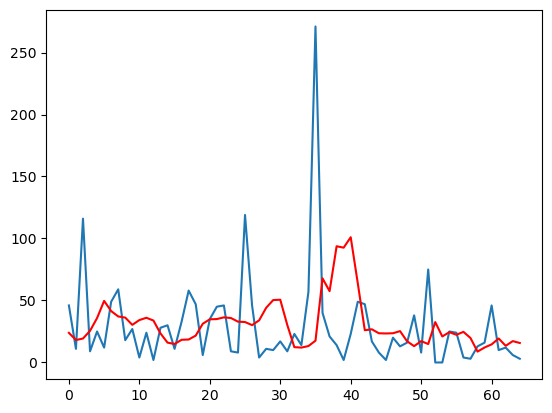

predicted=4.991447, expected=0.000000
predicted=3.536330, expected=9.000000
predicted=3.376495, expected=4.000000
predicted=4.507962, expected=3.000000
predicted=3.675621, expected=1.000000
predicted=3.025868, expected=4.000000
predicted=3.402521, expected=2.000000
predicted=4.359611, expected=3.000000
predicted=2.845969, expected=0.000000
predicted=2.061864, expected=0.000000
predicted=1.413280, expected=7.000000
predicted=3.045222, expected=1.000000
predicted=2.599327, expected=1.000000
predicted=1.547640, expected=16.000000
predicted=4.302483, expected=15.000000
predicted=7.779324, expected=1.000000
predicted=6.073718, expected=0.000000
predicted=3.879712, expected=3.000000
predicted=5.867589, expected=0.000000
predicted=6.814552, expected=4.000000
predicted=4.616438, expected=14.000000
predicted=4.439825, expected=8.000000
predicted=5.026610, expected=12.000000
predicted=6.500699, expected=2.000000
predicted=5.545027, expected=6.000000
predicted=6.814942, expected=2.000000
predicte

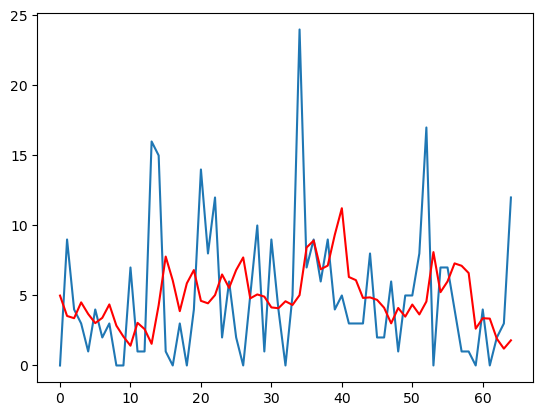

predicted=0.166537, expected=0.000000
predicted=0.235180, expected=2.000000
predicted=0.320106, expected=8.000000
predicted=0.766161, expected=3.000000
predicted=1.530454, expected=0.000000
predicted=2.075052, expected=1.000000
predicted=2.898259, expected=0.000000
predicted=3.282133, expected=2.000000
predicted=2.510961, expected=0.000000
predicted=0.974362, expected=5.000000
predicted=0.886737, expected=0.000000
predicted=1.309590, expected=2.000000
predicted=1.376802, expected=0.000000
predicted=1.749749, expected=3.000000
predicted=1.718969, expected=2.000000
predicted=1.882037, expected=0.000000
predicted=1.235808, expected=0.000000
predicted=1.313860, expected=0.000000
predicted=1.221851, expected=0.000000
predicted=1.020852, expected=0.000000
predicted=0.336222, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.064910, expected=0.000000
predicted=0.145391, expected=3.000000
predicted=0.

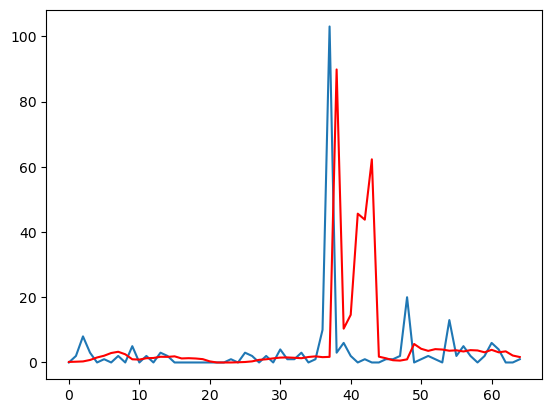

predicted=0.868936, expected=0.000000
predicted=1.246640, expected=0.000000
predicted=1.176797, expected=2.000000
predicted=0.521503, expected=1.000000
predicted=0.875204, expected=1.000000
predicted=1.104926, expected=3.000000
predicted=1.103198, expected=3.000000
predicted=1.723040, expected=1.000000
predicted=2.009494, expected=1.000000
predicted=1.681362, expected=0.000000
predicted=1.375945, expected=5.000000
predicted=2.033704, expected=1.000000
predicted=1.860570, expected=1.000000
predicted=1.796619, expected=2.000000
predicted=1.452369, expected=0.000000
predicted=1.573723, expected=6.000000
predicted=2.289875, expected=0.000000
predicted=1.768268, expected=0.000000
predicted=1.911244, expected=5.000000
predicted=1.565931, expected=0.000000
predicted=2.137124, expected=2.000000
predicted=2.302559, expected=2.000000
predicted=1.156978, expected=5.000000
predicted=2.463082, expected=0.000000
predicted=2.379295, expected=0.000000
predicted=1.873843, expected=0.000000
predicted=1.

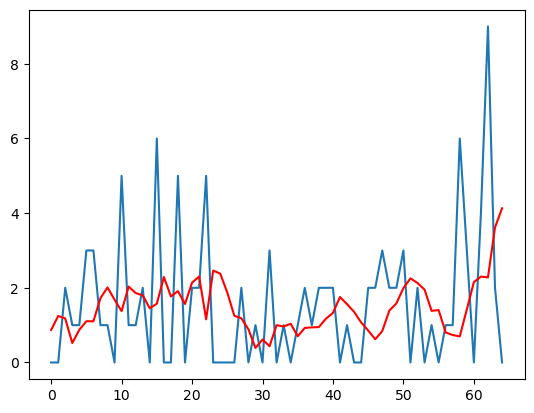

predicted=1.420102, expected=24.000000
predicted=6.565329, expected=0.000000
predicted=4.645708, expected=8.000000
predicted=6.128138, expected=2.000000
predicted=5.532141, expected=2.000000
predicted=5.865589, expected=3.000000
predicted=6.001250, expected=5.000000
predicted=3.469698, expected=0.000000
predicted=3.095304, expected=7.000000
predicted=3.409684, expected=1.000000
predicted=2.914000, expected=8.000000
predicted=4.270368, expected=0.000000
predicted=3.328935, expected=0.000000
predicted=2.442961, expected=1.000000
predicted=2.566901, expected=0.000000
predicted=1.514532, expected=0.000000
predicted=1.325606, expected=9.000000
predicted=2.179716, expected=0.000000
predicted=1.734603, expected=2.000000
predicted=2.011528, expected=0.000000
predicted=1.656447, expected=1.000000
predicted=1.871531, expected=3.000000
predicted=2.483204, expected=2.000000
predicted=1.433400, expected=6.000000
predicted=2.614697, expected=2.000000
predicted=2.405233, expected=1.000000
predicted=2

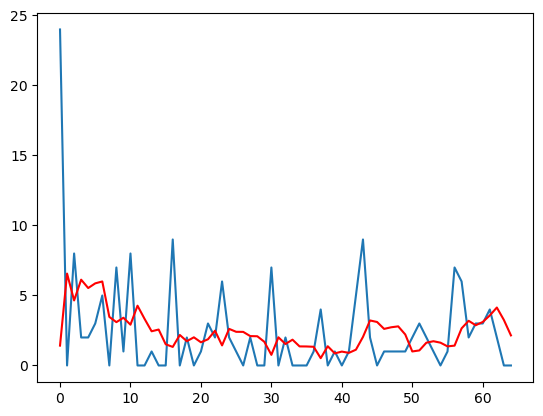

predicted=2.212238, expected=0.000000
predicted=2.329841, expected=2.000000
predicted=3.930007, expected=0.000000
predicted=2.945610, expected=0.000000
predicted=2.811876, expected=1.000000
predicted=2.805287, expected=7.000000
predicted=1.230504, expected=0.000000
predicted=1.344292, expected=0.000000
predicted=1.760651, expected=0.000000
predicted=1.423508, expected=0.000000
predicted=1.136083, expected=1.000000
predicted=2.027986, expected=2.000000
predicted=0.339888, expected=2.000000
predicted=0.644030, expected=1.000000
predicted=0.907138, expected=0.000000
predicted=0.989501, expected=0.000000
predicted=1.084241, expected=0.000000
predicted=0.961735, expected=0.000000
predicted=0.662153, expected=0.000000
predicted=0.270087, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=4.000000
predicted=0.543251, expected=0.000000
predicted=0.333107, expected=0.000000
predicted=0.867719, expected=0.000000
predicted=0.704939, expected=0.000000
predicted=0.

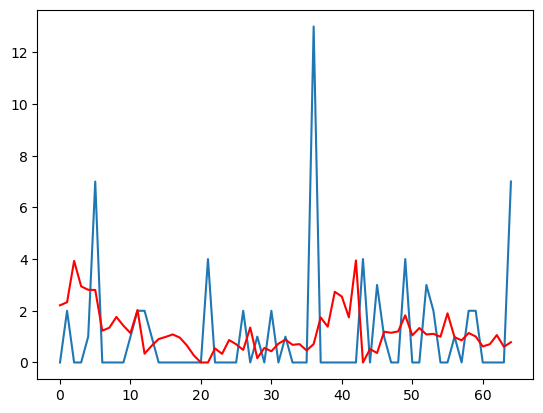

predicted=0.146336, expected=0.000000
predicted=0.170486, expected=2.000000
predicted=0.674363, expected=0.000000
predicted=0.370641, expected=0.000000
predicted=0.292772, expected=0.000000
predicted=0.359322, expected=0.000000
predicted=0.529780, expected=0.000000
predicted=0.110805, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=3.000000
predicted=0.608576, expected=0.000000
predicted=0.475813, expected=1.000000
predicted=0.631442, expected=0.000000
predicted=0.706394, expected=1.000000
predicted=1.119571, expected=3.000000
predicted=1.069037, expected=0.000000
predicted=0.916334, expected=0.000000
predicted=0.660286, expected=7.000000
predicted=2.005906, expected=2.000000
predicted=2.100263, expected=0.000000
predicted=1.902049, expected=0.000000
predicted=1.854176, expected=0.000000
predicted=2.

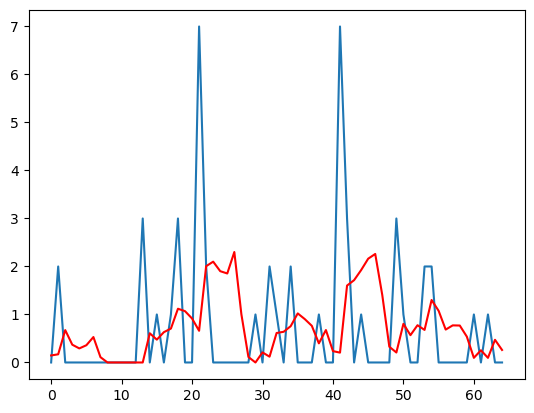

predicted=2.712870, expected=0.000000
predicted=2.410965, expected=1.000000
predicted=2.633073, expected=0.000000
predicted=2.431135, expected=0.000000
predicted=0.545134, expected=42.000000
predicted=6.747610, expected=1.000000
predicted=4.367111, expected=9.000000
predicted=9.073399, expected=0.000000
predicted=9.874562, expected=7.000000
predicted=11.807894, expected=6.000000
predicted=14.046834, expected=0.000000
predicted=4.242950, expected=3.000000
predicted=3.881746, expected=1.000000
predicted=3.372984, expected=1.000000
predicted=3.023394, expected=0.000000
predicted=1.728225, expected=1.000000
predicted=1.111927, expected=3.000000
predicted=1.360725, expected=2.000000
predicted=1.295529, expected=3.000000
predicted=1.510510, expected=0.000000
predicted=1.651019, expected=5.000000
predicted=2.220744, expected=0.000000
predicted=2.355778, expected=3.000000
predicted=2.014055, expected=0.000000
predicted=1.949769, expected=6.000000
predicted=2.205865, expected=7.000000
predicted

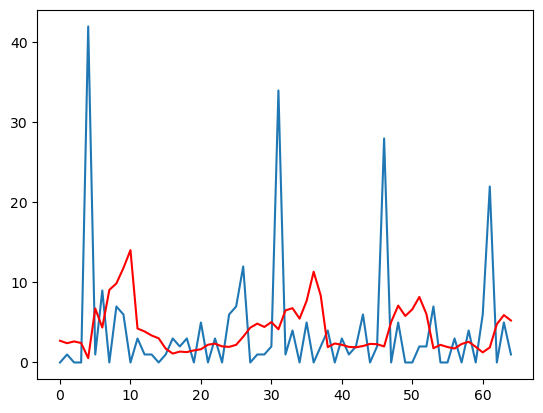

predicted=2.186158, expected=2.000000
predicted=5.009701, expected=2.000000
predicted=2.260226, expected=0.000000
predicted=1.558978, expected=2.000000
predicted=1.976336, expected=0.000000
predicted=0.722477, expected=3.000000
predicted=1.444635, expected=0.000000
predicted=0.602444, expected=0.000000
predicted=1.909779, expected=3.000000
predicted=1.026597, expected=0.000000
predicted=0.224482, expected=3.000000
predicted=1.809375, expected=4.000000
predicted=1.039598, expected=0.000000
predicted=2.035925, expected=2.000000
predicted=3.317534, expected=0.000000
predicted=1.459593, expected=0.000000
predicted=1.530264, expected=3.000000
predicted=0.625892, expected=5.000000
predicted=0.383440, expected=0.000000
predicted=1.666709, expected=1.000000
predicted=3.795696, expected=1.000000
predicted=1.731687, expected=4.000000
predicted=1.307244, expected=0.000000
predicted=0.896019, expected=1.000000
predicted=2.660092, expected=1.000000
predicted=1.363394, expected=0.000000
predicted=0.

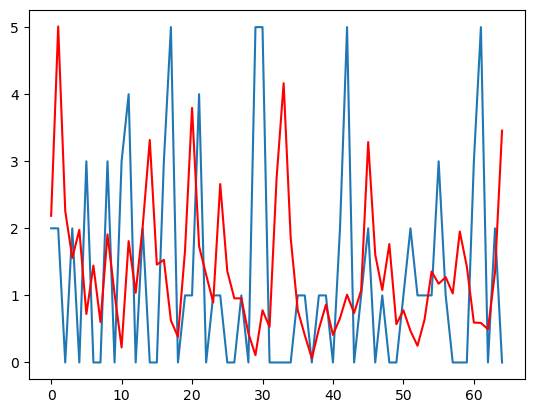

predicted=0.845938, expected=0.000000
predicted=0.249652, expected=0.000000
predicted=0.097538, expected=1.000000
predicted=0.272897, expected=0.000000
predicted=0.066962, expected=0.000000
predicted=0.094564, expected=1.000000
predicted=0.489837, expected=0.000000
predicted=0.316116, expected=2.000000
predicted=0.733694, expected=0.000000
predicted=0.356900, expected=0.000000
predicted=0.442697, expected=0.000000
predicted=0.532010, expected=0.000000
predicted=0.506528, expected=0.000000
predicted=0.196145, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.269921, expected=0.000000
predicted=0.070116, expected=1.000000
predicted=0.363036, expected=0.000000
predicted=0.288001, expected=0.000000
predicted=0.346287, expected=0.000000
predicted=0.314201, expected=0.000000
predicted=0.252411, expected=1.000000
predicted=0.366010, expected=0.000000
predicted=0.071846, expected=10.000000
predicted=2.736180, expected=1.000000
predicted=1.397909, expected=4.000000
predicted=2

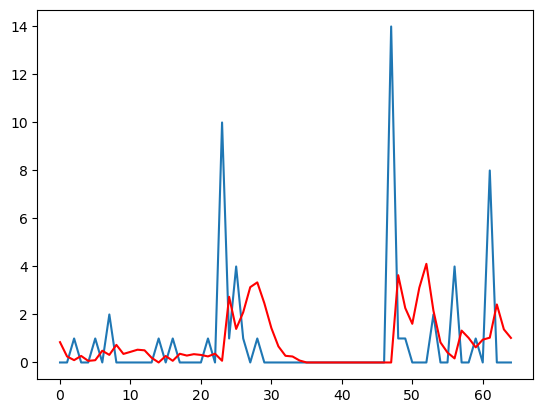

predicted=0.304521, expected=0.000000
predicted=0.156409, expected=0.000000
predicted=0.150129, expected=0.000000
predicted=0.141475, expected=0.000000
predicted=0.161247, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=3.000000
predicted=0.747739, expected=0.000000
predicted=0.432250, expected=0.000000
predicted=0.474187, expected=0.000000
predicted=0.457549, expected=2.000000
predicted=0.906311, expected=1.000000
predicted=1.004986, expected=0.000000
predicted=0.444665, expected=0.000000
predicted=0.487946, expected=1.000000
predicted=0.701495, expected=0.000000
predicted=0.590440, expected=0.000000
predicted=0.309487, expected=0.000000
predicted=0.171120, expected=0.000000
predicted=0.141208, expected=0.000000
predicted=0.153814, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.

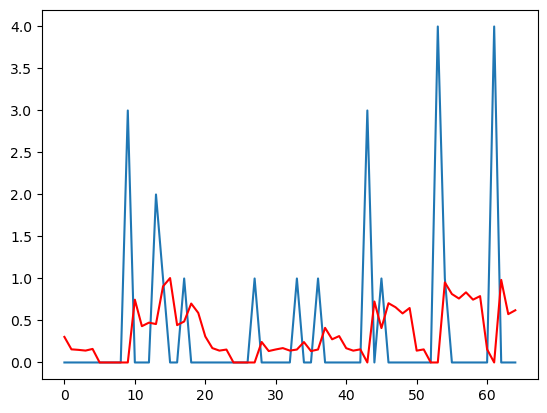

predicted=0.181800, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=2.000000
predicted=0.286885, expected=0.000000
predicted=0.260101, expected=0.000000
predicted=0.

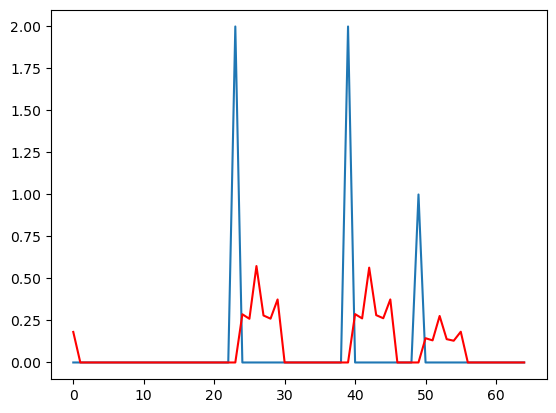

predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.125810, expected=0.000000
predicted=0.155881, expected=0.000000
predicted=0.382099, expected=0.000000
predicted=0.126086, expected=0.000000
predicted=0.085306, expected=0.000000
predicted=0.127642, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.125631, expected=0.000000
predicted=0.155570, expected=0.000000
predicted=0.381091, expected=0.000000
predicted=0.126289, expected=0.000000
predicted=0.085820, expected=0.000000
predicted=0.128384, expected=0.000000
predicted=0.000000, expected=16.000000
predicted=2

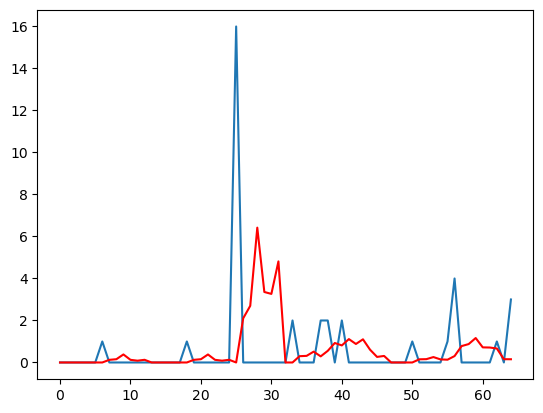

predicted=5.134038, expected=2.000000
predicted=4.724687, expected=2.000000
predicted=4.383808, expected=2.000000
predicted=4.068685, expected=0.000000
predicted=2.293723, expected=0.000000
predicted=1.884380, expected=0.000000
predicted=1.002258, expected=0.000000
predicted=0.654624, expected=6.000000
predicted=0.998766, expected=1.000000
predicted=1.148557, expected=5.000000
predicted=2.013105, expected=0.000000
predicted=2.117082, expected=2.000000
predicted=2.503055, expected=1.000000
predicted=2.425955, expected=5.000000
predicted=2.192302, expected=16.000000
predicted=4.046707, expected=0.000000
predicted=4.331482, expected=3.000000
predicted=5.055159, expected=2.000000
predicted=4.558631, expected=0.000000
predicted=4.587706, expected=1.000000
predicted=3.523507, expected=5.000000
predicted=1.620625, expected=0.000000
predicted=1.890136, expected=0.000000
predicted=1.530549, expected=3.000000
predicted=1.379331, expected=3.000000
predicted=1.895189, expected=5.000000
predicted=2

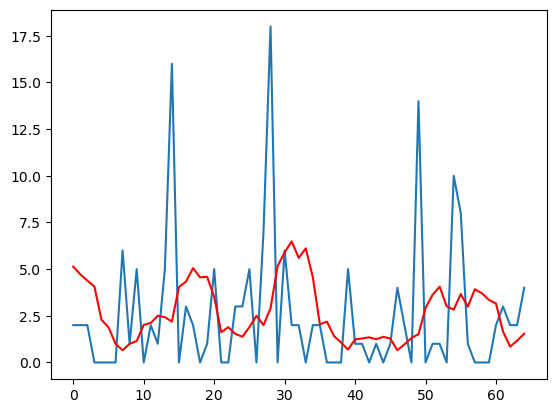

predicted=0.312304, expected=0.000000
predicted=0.278488, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=3.000000
predicted=0.421341, expected=0.000000
predicted=0.603247, expected=0.000000
predicted=0.484143, expected=0.000000
predicted=0.611560, expected=0.000000
predicted=0.471121, expected=0.000000
predicted=0.421324, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=2.000000
predicted=0.280719, expected=0.000000
predicted=0.400972, expected=0.000000
predicted=0.322111, expected=0.000000
predicted=0.406383, expected=0.000000
predicted=0.313354, expected=1.000000
predicted=0.419689, expected=0.000000
predicted=0.199967, expected=3.000000
predicted=0.577726, expected=0.000000
predicted=0.810573, expected=0.000000
predicted=0.

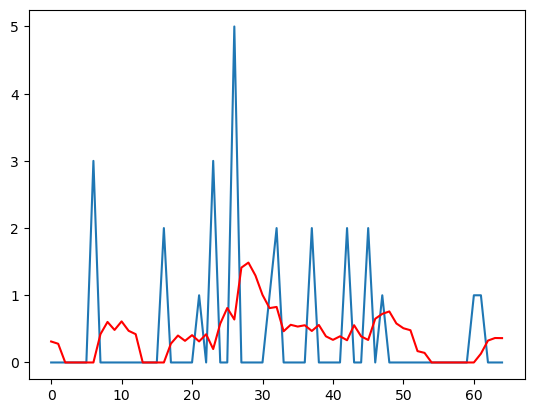

predicted=1.590705, expected=2.000000
predicted=1.897337, expected=1.000000
predicted=1.948118, expected=0.000000
predicted=0.877602, expected=0.000000
predicted=1.184566, expected=10.000000
predicted=2.964596, expected=0.000000
predicted=2.435351, expected=1.000000
predicted=2.716522, expected=2.000000
predicted=1.703416, expected=3.000000
predicted=1.693518, expected=6.000000
predicted=4.455240, expected=1.000000
predicted=2.344947, expected=0.000000
predicted=2.108590, expected=4.000000
predicted=2.421020, expected=0.000000
predicted=1.738056, expected=0.000000
predicted=1.943845, expected=1.000000
predicted=0.826971, expected=4.000000
predicted=1.472244, expected=0.000000
predicted=1.601810, expected=1.000000
predicted=1.286938, expected=3.000000
predicted=1.466008, expected=0.000000
predicted=1.174609, expected=1.000000
predicted=1.700471, expected=0.000000
predicted=0.577067, expected=0.000000
predicted=0.568549, expected=3.000000
predicted=1.340962, expected=0.000000
predicted=0

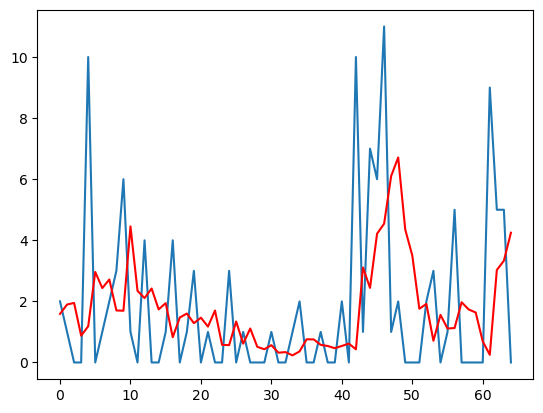

/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000000, expected=0.000000


/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000


KeyboardInterrupt: 

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

temp_ls = []

for region in data2:
    temp_region = data2[region]
    #print(temp_region
      
    y = temp_region.values 
    train, test = train_test_split(y, train_size=150)


    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        if yhat < 0: 
            yhat = 0
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
	   # print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
    rmse = sqrt(mean_squared_error(test,predictions))
    print('Test RMSE: %.3f' % rmse)
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()
    

In [58]:
region_AA

Event,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,3,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,1,0,4,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0
4,6,1,59,3,0,103,0,4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,13,9,20,85,4,2,0,2,8,0,0,0,0,0,0,1,8,0,0,0
211,14,5,8,10,1,0,0,1,0,1,0,1,0,0,0,0,3,0,2,0
212,5,2,0,23,3,2,5,1,0,0,2,0,0,0,0,3,4,0,4,0
213,3,2,7,37,6,10,4,7,0,1,1,1,0,0,0,0,0,0,0,0


In [59]:
region_AA["01"]

0       0
1       2
2       0
3       0
4       6
       ..
210    13
211    14
212     5
213     3
214     7
Name: 01, Length: 215, dtype: int64

In [60]:
print(len(region_AA["01"]))

215


In [61]:
type(region_AA["01"])

pandas.core.series.Series

In [62]:
event1_region1 = region_AA["01"]

In [63]:
event1_region1 

0       0
1       2
2       0
3       0
4       6
       ..
210    13
211    14
212     5
213     3
214     7
Name: 01, Length: 215, dtype: int64

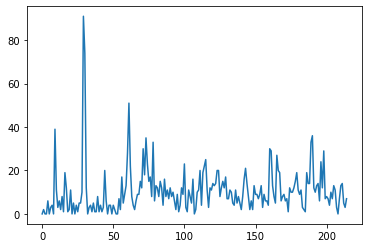

In [64]:
plt.plot(event1_region1)

                               SARIMAX Results                                
Dep. Variable:                     01   No. Observations:                  215
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -839.904
Date:                Mon, 15 Aug 2022   AIC                           1691.809
Time:                        18:42:54   BIC                           1711.976
Sample:                             0   HQIC                          1699.959
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9973      0.053    -18.758      0.000      -1.101      -0.893
ar.L2         -0.9308      0.061    -15.248      0.000      -1.050      -0.811
ar.L3         -0.7459      0.090     -8.260      0.0

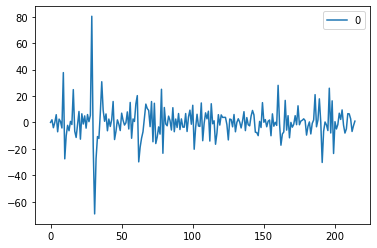

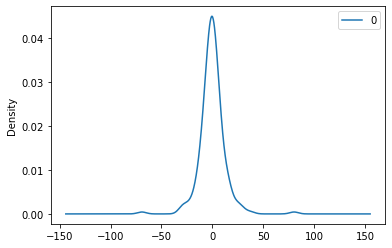

                0
count  215.000000
mean    -0.019262
std     12.410441
min    -69.213207
25%     -5.791580
50%      0.000000
75%      5.216406
max     80.322493


In [107]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

model = ARIMA(event1_region1, order=(5,2,0))

model_fit = model.fit()

print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=10.378359, expected=18.000000
predicted=12.711846, expected=7.000000
predicted=13.390080, expected=3.000000
predicted=9.632406, expected=6.000000
predicted=6.511927, expected=2.000000
predicted=6.866118, expected=8.000000
predicted=6.437873, expected=4.000000
predicted=4.884674, expected=4.000000
predicted=4.859508, expected=8.000000
predicted=4.965763, expected=5.000000
predicted=5.888147, expected=15.000000
predicted=7.883687, expected=12.000000
predicted=9.209998, expected=10.000000
predicted=10.227218, expected=21.000000
predicted=12.148052, expected=3.000000
predicted=11.940896, expected=8.000000
predicted=10.355307, expected=6.000000
predicted=8.066011, expected=10.000000
predicted=10.337203, expected=0.000000
predicted=6.402282, expected=0.000000
predicted=3.795536, expected=22.000000
predicted=7.540846, expected=7.000000
predicted=9.793476, expected=3.000000
predicted=7.193235, expected=0.000000
predicted=3.391349, expected=27.000000
predicted=11.493461, expected=4.00

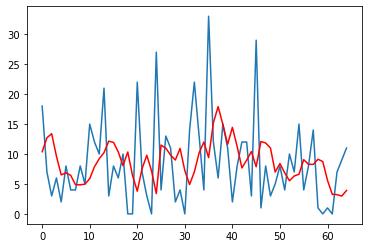

In [105]:
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

y = event1_region1.values 
train, test = train_test_split(y, train_size=150)


history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	if yhat < 0:
		yhat = 0 
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

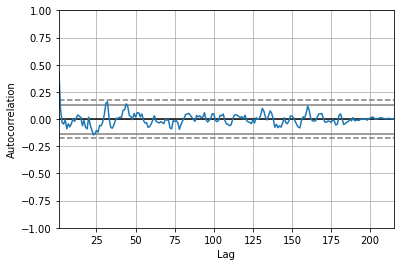

In [71]:
autocorrelation_plot(event1_region1)

/Users/gheyrich/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/gheyrich/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/gheyrich/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/gheyrich/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


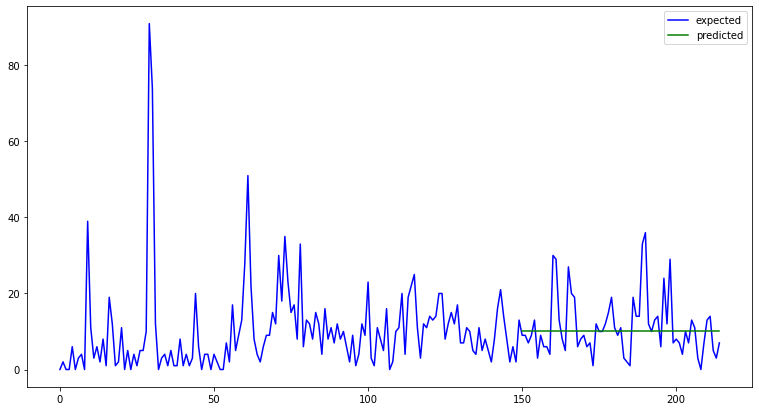

In [70]:
from sklearn.model_selection import train_test_split
import pmdarima as pm
from pmdarima import auto_arima


y = event1_region1.values 
train, test = train_test_split(y, train_size=150)


# Fit model
model = pm.auto_arima(train, seasonal=True, m=12)

forecasts = model.predict(test.shape[0])  

x = np.arange(y.shape[0])
plt.figure(figsize = (13,7))
plt.plot(x, y, c='blue' , label = 'expected')
plt.plot(x[150:], forecasts, c='green' , label = 'predicted')
plt.legend()
plt.show()